### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [9]:
data = pd.read_csv('data/coupons.csv')

In [10]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [12]:
data.isnull().sum()
#data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [13]:
#3. Decide what to do about your missing data -- drop, replace, other ...
# Remove the 'car' column from the dataset
data.drop('car',axis = 1, inplace = True)

# Display information about the dataset including data types and non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [14]:
# Remove all rows containing any missing values (NaN)
data = data.dropna()
data.info()
# Check and display the count of missing values in each column
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

# Missing data are of three types:
<b>Occasionality of :{Bar, Coffee House, Carryaway, Restaurant cheap or expensive} and car) </b><br>
We drop the car column in investigation. Data is too scarce and replacing is not an option 
We can use the data of those available as a witness data but no more
# Occasinality data:
<b> 42 of missiing out eating habits are missing on all categories.</b> Those we can eliminate 42/12500
<b> There doesn't seem to be correlation between other answers and other occasionals so we just eliminate all rows containing them. They are only less than 7% of the data. </b>
<b> ALternatively, we can eliminate them one by one when using the particular data</b>





4. What proportion of the total observations chose to accept the coupon?



In [17]:
# Get total number of records in dataset
totalNumber = data['Y'].count()
# Count number of records where Y equals 1 (accepted)
numberAccepted = (data['Y']==1).sum()
# Calculate percentage of accepted records
percentAccepted = numberAccepted/totalNumber;
# Print total number of records
print(totalNumber)
# Print number of accepted records
print(numberAccepted)
# Print percentage of accepted records
print(percentAccepted)

12079
6877
0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']
['Low restaurant' 'Coffee House' 'Bar' 'Take away' 'Mid restaurant']
coupon
Coffee House      3816
Low restaurant    2653
Take away         2280
Bar               1913
Mid restaurant    1417
Name: count, dtype: int64


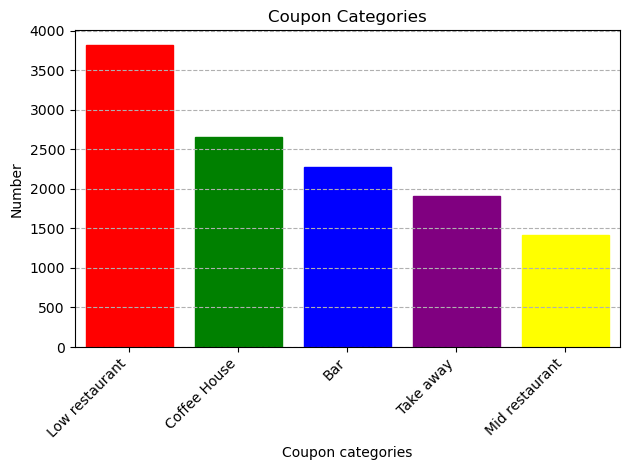

In [19]:
# Get all unique values from the 'coupon' column in the dataset prior to the change
categories = data['coupon'].unique()
print(categories)
# Replace restaurant categories with more readable names
data['coupon'] = data['coupon'].replace({'Restaurant(<20)':'Low restaurant'})
data['coupon'] = data['coupon'].replace({'Restaurant(20-50)':'Mid restaurant'})
data['coupon'] = data['coupon'].replace({'Carry out & Take away':'Take away'})

# Get all unique values from the 'coupon' column in the dataset
categories = data['coupon'].unique()
# Display the unique coupon categories
print(categories)
# Count the frequency of each unique value in the 'coupon' column
counts = data['coupon'].value_counts()
# Display the frequency counts for each coupon category
print(counts)
# Create a bar plot using seaborn with:
# - x-axis: coupon categories
# - y-axis: count of each category
# - bars colored in skyblue
ax = sns.barplot(x=categories, y=counts, color = 'skyblue')
# Set the x-axis label to 'Coupon categories'
plt.xlabel('Coupon categories')
# Set the y-axis label to 'Number' to show count
plt.ylabel('Number')
# Set the plot title to 'Coupon Categories'
plt.title('Coupon Categories')
# Set x-axis tick locations to match the coupon categories array
plt.xticks(categories)
# Add dotted horizontal grid lines to improve readability of the y-axis values
plt.grid(axis='y', linestyle='--') 
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  
# Adjust the layout to prevent overlapping of plot elements
plt.tight_layout()

def apply_color_scheme(ax: plt.Axes, colors: list[str]) -> None:
    """
    Applies a color scheme to the bars in a matplotlib bar plot.
    
    Args:
        ax (plt.Axes): The matplotlib axes object containing the bar plot
        colors (list[str]): List of color names or hex codes to apply to bars
        
    Returns:
        None
    """
    for bar, color in zip(ax.patches, colors):
        bar.set_color(color)

# Define color scheme
bar_colors = ['red', 'green', 'blue', 'purple', 'yellow']
# Apply colors to bars
apply_color_scheme(ax, bar_colors)
# Display the plot    
plt.show()
#plt.savefig('images/filename.png')

1. Created a dedicated function for applying colors, making the code more reusable and maintainable
2. Added descriptive docstring explaining the function's purpose and parameters
3. Used `zip()` instead of `enumerate()` since we don't need the index
4. Separated the color definition from the application logic


6. Use a histogram to visualize the temperature column.

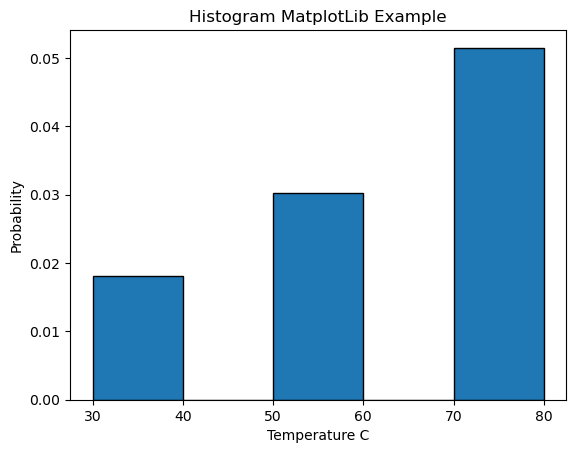

In [22]:
plt.hist(data['temperature'], edgecolor='black',bins = 5, density = True)
plt.title('Histogram MatplotLib Example')
plt.xlabel('Temperature C')
plt.ylabel('Probability')
plt.show()


Text(0, 0.5, 'Probability')

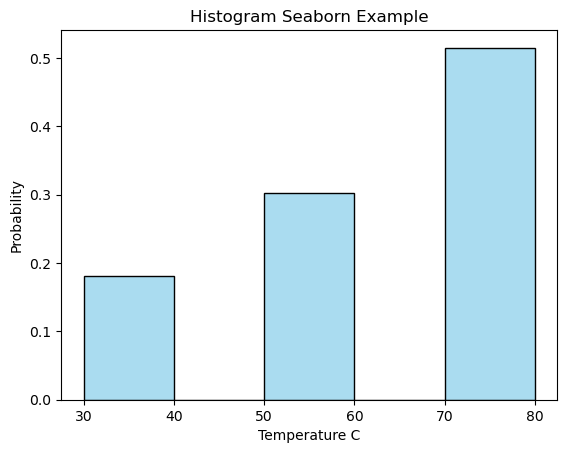

In [23]:
# Create a histogram using Seaborn's histplot:
# - data: input DataFrame
# - x: column 'temperature' to plot
# - bins: divide data into 5 equal-width bins
# - stat: show probability distribution instead of counts
# - alpha: set transparency to 0.7
# - color: set bars to 'skyblue' color
sns.histplot(data=data, x='temperature', bins = 5, stat= 'probability', alpha = 0.7, color = 'skyblue')
plt.title('Histogram Seaborn Example')
plt.xlabel('Temperature C')
plt.ylabel('Probability')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
dfBar = data[data['coupon'].str.contains('Bar')]
dfBar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [27]:
# Get total number of records in dataset
totalNumberBar = dfBar['Y'].count()
# Count number of records where Y equals 1 (accepted)
numberAcceptedBar = (dfBar['Y']==1).sum()
# Calculate percentage of accepted records
percentAcceptedBar = numberAcceptedBar/totalNumberBar;
# Print total number of records
print('Total number of Bar coupons are=',totalNumberBar)
# Print number of accepted records
print('Nymber of Bar coupons accepted is=',numberAcceptedBar)
# Print percentage of accepted records
print('Percent of Bar coupons accepte is =',percentAcceptedBar)

Total number of Bar coupons are= 1913
Nymber of Bar coupons accepted is= 788
Percent of Bar coupons accepte is = 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [29]:
values = dfBar['Bar'].unique()
print(values)
lessThanThree = ['never', 'less1', '1~3']
numberLessThanThree = len(dfBar.query('Bar in @lessThanThree and Y==1'))
print('Number of Bar accepted coupons among those that went less than three times per month=',numberLessThanThree)
print('Rate of acceptance amoung those that went less than three times amount is',numberLessThanThree/numberAcceptedBar)
numberGreaterThanThree = numberAcceptedBar - numberLessThanThree
print('Number of Bar accepted coupons among those that went more than three times per month=',numberGreaterThanThree)
print('Rate of acceptance amoung those that went more than three times amount is',numberGreaterThanThree/numberAcceptedBar)

['never' 'less1' '1~3' 'gt8' '4~8']
Number of Bar accepted coupons among those that went less than three times per month= 641
Rate of acceptance amoung those that went less than three times amount is 0.8134517766497462
Number of Bar accepted coupons among those that went more than three times per month= 147
Rate of acceptance amoung those that went more than three times amount is 0.1865482233502538


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [31]:
# Replace the age with alphanumric value sto allow correlation and easier selection
dfBar['age'] = dfBar['age'].replace({'21':21,'46':46,'26':26,'31':31,'41':41,'50plus':60,'below21':10, '36':36})
dfBar['age'].unique()
bar_labels = dfBar['Bar'].unique()
dfBar['Bar'] = dfBar['Bar'].replace({'never':0, 'less1':1, '1~3':2, '4~8':4,'gt8':8}) 
dfBar['Bar'].unique()

C:\Users\c52008\AppData\Local\Temp\ipykernel_21844\1673953504.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfBar['age'] = dfBar['age'].replace({'21':21,'46':46,'26':26,'31':31,'41':41,'50plus':60,'below21':10, '36':36})
C:\Users\c52008\AppData\Local\Temp\ipykernel_21844\1673953504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBar['age'] = dfBar['age'].replace({'21':21,'46':46,'26':26,'31':31,'41':41,'50plus':60,'below21':10, '36':36})
C:\Users\c52008\AppData\Local\Temp\ipykernel_21844\1673953504.py:5: Fu

array([0, 1, 2, 8, 4], dtype=int64)

[96, 180, 176, 81, 21]
554
[ 96 276 452 533 554]


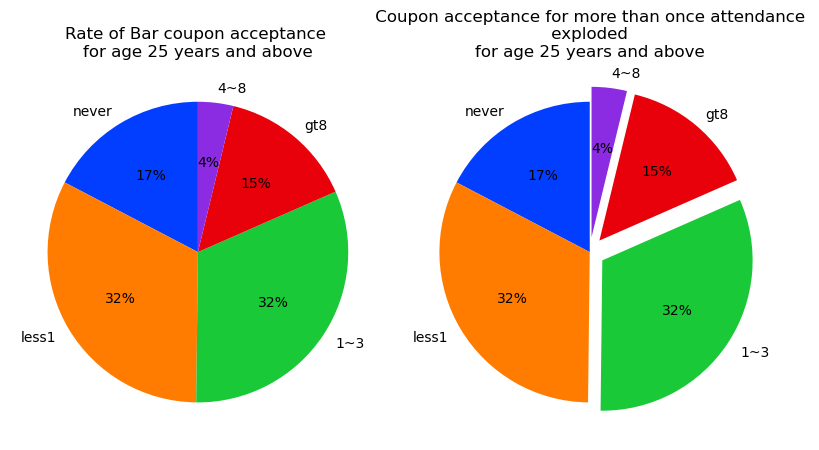

In [32]:
bar_attending_list = np.sort(dfBar['Bar'].unique())
#Sprint(bar_attending_list)

#Initializing the number accepting Bar coupon array
number_attending_bar_over25= [None]*len(bar_attending_list)
count = 0
for attending_bar_item in bar_attending_list:
    number_attending_bar_over25[count] = len(dfBar.query('Bar ==@attending_bar_item and Y==1 and age >= 25'))
    #print((number_attending_bar_over25[count]))
    count = count+1

total_bar_attendance_over25 = sum(number_attending_bar_over25)
total_bar_cum_attendance_over25 = np.cumsum(number_attending_bar_over25)
print(number_attending_bar_over25)
print(total_bar_attendance_over25)
print(total_bar_cum_attendance_over25)

rate_of_attendance_over_25 = [None]*len(number_attending_bar_over25)
rate_of_cum_attendance_over_25 = [None]*len(number_attending_bar_over25)
rate_of_attendance_over_25[:] = [x / total_bar_attendance_over25 for x in number_attending_bar_over25]
rate_of_cum_attendance_over_25[:] = [x / total_bar_attendance_over25 for x in total_bar_cum_attendance_over25]


fig, axes = plt.subplots(1, 2, figsize=(8, 6))
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
# plotting data on chart 
axes[0].pie(rate_of_attendance_over_25, labels=bar_labels, colors=palette_color, autopct='%.0f%%', startangle=90) 
# displaying chart 
axes[0].set_title('Rate of Bar coupon acceptance \nfor age 25 years and above')
explode=(0,0,0.1,0.1,0.1)
axes[1].pie(rate_of_attendance_over_25, labels=bar_labels, explode = explode, colors=palette_color, autopct='%.0f%%', startangle=90) 
# displaying chart 
axes[1].set_title(' Coupon acceptance for more than once attendance \n exploded \nfor age 25 years and above')

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  1913 non-null   object
 1   age     1913 non-null   int64 
 2   Bar     1913 non-null   int64 
 3   Y       1913 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 74.7+ KB


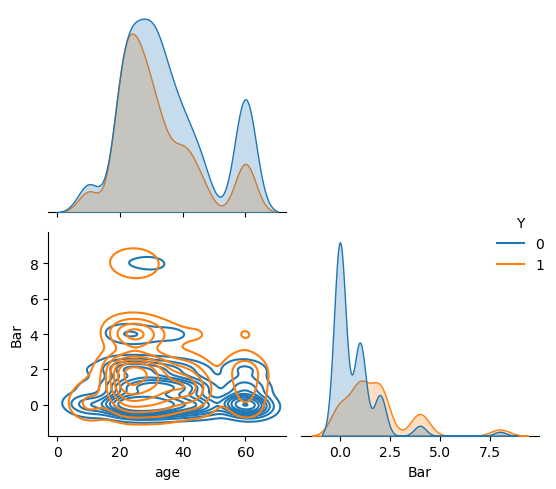

          age       Bar
age  1.000000 -0.077277
Bar -0.077277  1.000000
          age       Bar         Y
age  1.000000 -0.134865 -0.124452
Bar -0.134865  1.000000  0.355318
Y   -0.124452  0.355318  1.000000


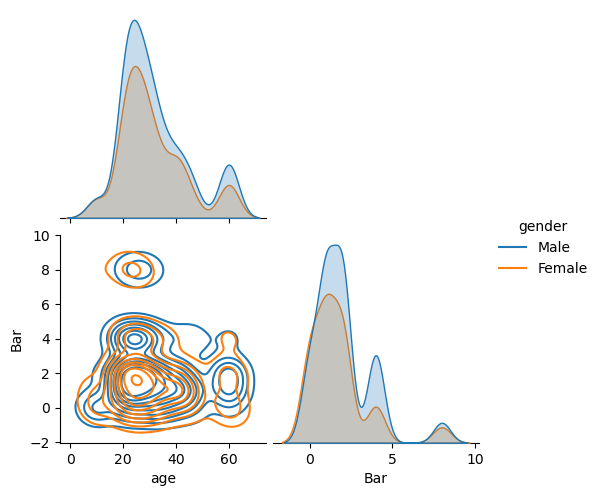

In [33]:
selectedColumns = ['gender','age','Bar','Y']
dfAgeBar = dfBar[selectedColumns];
dfAgeBar.info()

sns.pairplot(dfAgeBar,
             hue='Y',
             diag_kind = 'kde', kind = 'kde',
             corner = True, 
             diag_kws=dict(fill=True))
plt.tight_layout()
plt.show()

ageBarCorrelation = dfAgeBar[dfAgeBar['Y']==1][['age','Bar']].corr()
print(ageBarCorrelation)
ageBarYesCorrelation = dfAgeBar[['age','Bar','Y']].corr()
print(ageBarYesCorrelation)

sns.pairplot(dfAgeBar[dfAgeBar['Y']==1][['gender','age','Bar']], hue='gender', diag_kind = 'kde', kind ='kde',corner = True)
#sns.pairplot(dfAgeBar[dfAgeBar['Y']==1][['age','Bar']],  diag_kind = 'kde', kind ='reg',corner = True)

#

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']
                Bar  passanger         Y
Bar        1.000000   0.003642  0.355313
passanger  0.003642   1.000000  0.026511
Y          0.355313   0.026511  1.000000


C:\Users\c52008\AppData\Local\Temp\ipykernel_21844\29798972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfBar['passanger'].replace({'Alone':0, 'Kid(s)':1, 'Friend(s)':2,'Partner':4}, inplace = True)
C:\Users\c52008\AppData\Local\Temp\ipykernel_21844\29798972.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

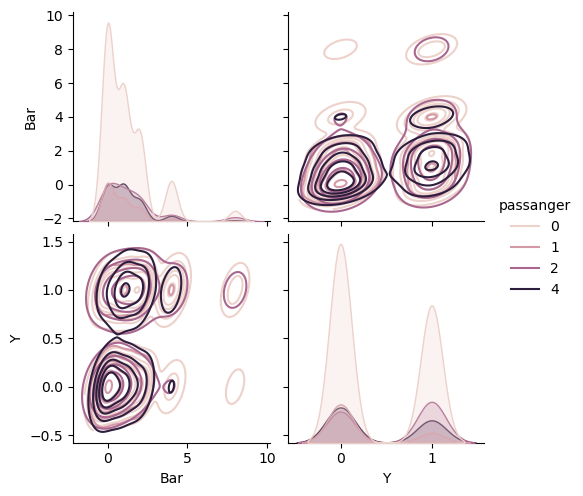

In [36]:
print(dfBar['passanger'].unique())
dfBar['passanger'].replace({'Alone':0, 'Kid(s)':1, 'Friend(s)':2,'Partner':4}, inplace = True)
print(dfBar['occupation'].unique())
filterOutOccupation = ['Farming Fishing & Forestry']
selectedColumns = ['Bar', 'passanger','Y']
barPassengerY = dfBar.query('occupation not in @filterOutOccupation')[selectedColumns]
print(barPassengerY.corr())
sns.pairplot(barPassengerY, hue='passanger', diag_kind = 'kde', kind ='kde',corner = False)
#sns.pairplot(barPassengerY[barPassengerY['Y']==1][['Bar', 'passanger']],  diag_kind = 'kde', kind ='kde',corner = False)


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



# Question six issues:
Surprisingly, we still have vague questions, possibly in the examiner's mind; questions six and seven come together. Question six does not mention that the goal is to find the statistics mentioned on the Bar coupon recipients. Hence, general acceptance rates could be evaluated.
Question seven on the other hand asks for the hypothesis of the Bar Interestingly, there are still some unclear questions that may be lingering in the examiner's mind, particularly regarding questions six and seven, which are closely related. 

Question six does not explicitly state that the goal is to find the statistics related to Bar coupon recipients. Therefore, it could also lead to the evaluation of general acceptance rates. 

On the other hand, question seven asks for the hypothesis concerning Bar coupon acceptors, suggesting two potential interpretations. One interpretation focuses on Bar coupon acceptors, while the other implies that, despite question six being an independent inquiry, students should also consider the hypothesis related to Bar coupon acceptors.

Consequently, question six, while more likely linked to Bar coupon acceptance, should be approached with both conditions in mind.coupon acceptors, hinting at two possibilities. One question is about bar coupon acceptors, and two, despite question six being an independent question, the students should evaluate the hypothesis asked for bar coupon acceptors.

Hence, question six, despite the higher probability of being related to Bar coupon acceptance, is solved with both conditions in mind.

## First if the whole data is considered without the Bar coupon specifically in mind:
We could have done it the same way as  we did with question five and change the objects to numerical values that can be searched easier. But here we practice the <b> "in" </b> and <b> "not in" </b> in the query and avoid the change.

In [117]:
# we previously used a for loop method to calculate all the attendance rates
#Here we would only use normal method
#go to bars more than once a month, had passengers that were not a kid, and were not widowed 
widowed = 'Widowed'
kid = 'Kid(s)'

goto_bar_once_or_less = ['never', 'less1']

bar_once_passngr_notkid_notwidowed = len(data.query('Bar not in @goto_bar_once_or_less and Y==1 and passanger not in @kid and maritalStatus not in @widowed'))
age_less_30_list = ['21', '26','below21'];
bar_once_age_less_30 =  len(data.query('Bar not in @goto_bar_once_or_less and Y==1 and age in @age_less_30_list'))
goto_restaurant_morethan4_list = ['4~8','gt8']
income_less_than_50k_list = []
data['income'] = data['income'].replace({'Less than $12500':12499, '$12500 - $24999':24999,'$25000 - $37499':37499,'$37500 - $49999':49999, '$50000 - $62499':62500, '$62500 - $74999':74500,'$75000 - $87499':87500,'$87500 - $99999':99999, '$100000 or More':100000 }, )
cheap_retaurant_4more_income50k = len(data.query('RestaurantLessThan20  in @goto_restaurant_morethan4_list and Y==1 and income <50000'))
total_acceptance = sum(data['Y'] ==1)

print('Number of acceptance for Bar attendance more than once and driver not widowed and passenger not kid=',bar_once_passngr_notkid_notwidowed)
print('Number of acceptance for Bar attendance more than once and age less than 30=',bar_once_age_less_30)
print('Number of acceptance if going to cheap restaurant 4 times and income less than 50k=',cheap_retaurant_4more_income50k)
print('Number of total acceptance=',total_acceptance)

bar_chart_numbers = [bar_once_passngr_notkid_notwidowed, bar_once_age_less_30, cheap_retaurant_4more_income50k]
rate_bar_chart_numbers_total = [None]*len(bar_chart_numbers)
rate_bar_chart_numbers_total[:] = [x / total_acceptance for x in bar_chart_numbers]
bar_chart_labels = ['Case 1','Case 2', 'Case 3']
print(rate_bar_chart_numbers_total)

Number of acceptance for Bar attendance more than once and driver not widowed and passenger not kid= 2225
Number of acceptance for Bar attendance more than once and age less than 30= 1364
Number of acceptance if going to cheap restaurant 4 times and income less than 50k= 1334
Number of total acceptance= 6877
[0.323542242256798, 0.1983423004216955, 0.1939799331103679]


## 2nd considering that the questions are about the Bar coupon receipients
If the question is about Bar coupon receients, we can us ethe data that we have already filtered in question four and five.
We write the questions again:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

<b>This time consider that they drivers are Bar coupon reciepients</b>
- also reminder: <b>#dfBar are the drivers in data that received Bar coupon as in dfBar = data[data['coupon'].str.contains('Bar')] </b>
- We already have replaced Bar attendance, passenger (passanger) and age to integers to use in search and correleate it.

In [119]:
bar_once_passngr_notkid_notwidowed = len(dfBar.query('Bar > 1 and Y==1 and passanger!=1 and maritalStatus not in @widowed'))
bar_once_age_less_30 =  len(dfBar.query('Bar > 1 and Y==1 and age < 30'))
dfBar['income'] = dfBar['income'].replace({'Less than $12500':12499, '$12500 - $24999':24999,'$25000 - $37499':37499,'$37500 - $49999':49999, '$50000 - $62499':62500, '$62500 - $74999':74500,'$75000 - $87499':87500,'$87500 - $99999':99999, '$100000 or More':100000 }, )
cheap_retaurant_4more_income50k = len(dfBar.query('RestaurantLessThan20  in @goto_restaurant_morethan4_list and Y==1 and income <50000'))
total_acceptance = total_acceptance = sum(dfBar['Y'] ==1)

print('Number of acceptance for Bar attendance more than once and driver not widowed and passenger not kid=',bar_once_passngr_notkid_notwidowed)
print('Number of acceptance for Bar attendance more than once and age less than 30=',bar_once_age_less_30)
print('Number of acceptance if going to cheap restaurant 4 times and income less than 50k=',cheap_retaurant_4more_income50k)
print('Number of total acceptance=',total_acceptance)

bar_chart_numbers = [bar_once_passngr_notkid_notwidowed, bar_once_age_less_30, cheap_retaurant_4more_income50k]
rate_bar_chart_numbers_BarCoupon = [None]*len(bar_chart_numbers)
rate_bar_chart_numbers_BarCoupon[:] = [x / total_acceptance for x in bar_chart_numbers]
bar_chart_labels = ['Case 1','Case 2', 'Case 3']
print(rate_bar_chart_numbers_BarCoupon)

Number of acceptance for Bar attendance more than once and driver not widowed and passenger not kid= 376
Number of acceptance for Bar attendance more than once and age less than 30= 236
Number of acceptance if going to cheap restaurant 4 times and income less than 50k= 152
Number of total acceptance= 788
[0.47715736040609136, 0.29949238578680204, 0.19289340101522842]


C:\Users\c52008\AppData\Local\Temp\ipykernel_21844\1793226809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBar['income'] = dfBar['income'].replace({'Less than $12500':12499, '$12500 - $24999':24999,'$25000 - $37499':37499,'$37500 - $49999':49999, '$50000 - $62499':62500, '$62500 - $74999':74500,'$75000 - $87499':87500,'$87500 - $99999':99999, '$100000 or More':100000 }, )


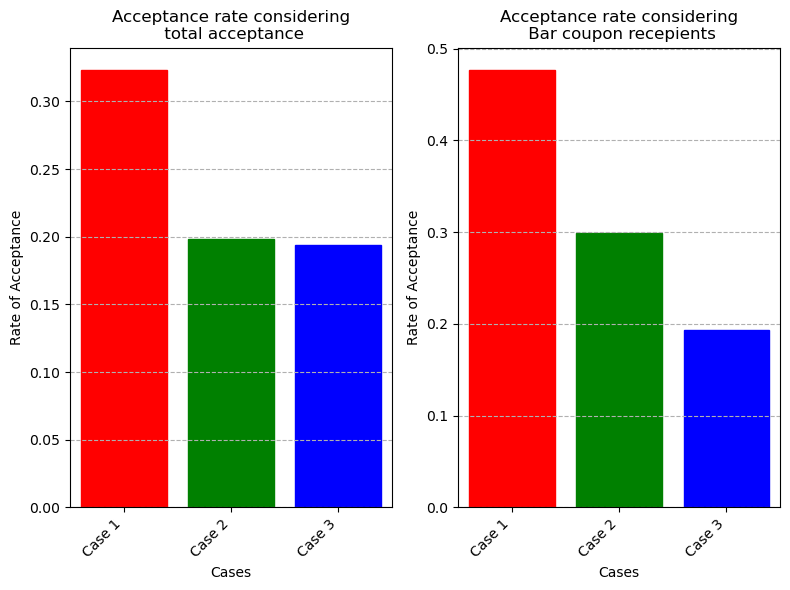

In [175]:
# Define color scheme
bar_colors = ['red', 'green', 'blue']
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
sns.barplot(x=bar_chart_labels, y=rate_bar_chart_numbers_total, color = 'skyblue', ax = axes[0])
# Set the x-axis label to 'Coupon categories'
axes[0].set_xlabel('Cases')
# Set the y-axis label to 'Number' to show count
axes[0].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[0].set_title('Acceptance rate considering\n total acceptance')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[0].grid(axis='y', linestyle='--')
# written to avoid warning
axes[0].xaxis.set_ticks([0,1,2]) 
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[0].set_xticklabels(bar_chart_labels, rotation=45, ha='right')  
# Apply colors to bars
apply_color_scheme(axes[0], bar_colors)


sns.barplot(x=bar_chart_labels, y=rate_bar_chart_numbers_BarCoupon, color = 'skyblue', ax = axes[1])
# Set the x-axis label to 'Coupon categories'
axes[1].set_xlabel('Cases')
# Set the y-axis label to 'Number' to show count
axes[1].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[1].set_title('Acceptance rate considering\n Bar coupon recepients')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[1].grid(axis='y', linestyle='--')
# written to avoid warning
axes[1].xaxis.set_ticks([0,1,2]) 
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[1].set_xticklabels(bar_chart_labels, rotation=45, ha='right')  
# Apply colors to bars
apply_color_scheme(axes[1], bar_colors)
# Display the plot    
plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  